In [2]:
student_table = {
    '1':12.706,
    '2':4.3027,
    '3':3.1825,
    '4':2.7764,
    '5':2.5706,
    '6':2.4469,
    '7':2.3646,
    '8':2.3060,
    '9':2.2622,
    '10':2.2281,
    '11':2.2010,
    '12':2.1788,
    '13':2.1604,
    '14':2.1448,
    '15':2.1315
}

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([78,82,87,79,89,106,67,88,73,87,76,115])
y = np.array([133, 148,134,154,162,195,139,158,152, 162,159,173])
y_avg = np.average(y)
x_avg = np.average(x)
b = np.cov(x,y)[0, 1]/np.cov(x,x)[0, 1]
a = y_avg - b*x_avg
reg = a + b * x
A = np.round((np.abs((y-reg)/y) * 100) , 2)

data = {
    'x':x,
    'y':y,
    'xy':x*y,
    'x^2':x**2,
    '(x-x_avg)^2': np.round(((x-x_avg)**2), 2),
    '(y-y_avg)^2':  np.round(((y-y_avg)**2), 2),
    'regression' : np.round(reg, 2),
    'y-reg': np.round((y - reg), 2),
    '(y-reg)^2': np.round(((y - reg) ** 2), 2),
    'appr': A    
}
df = pd.DataFrame(data)
sum_row = df.sum()
mean_row = df.mean()

# Создаем DataFrame из новых строк
sum_df = pd.DataFrame(sum_row).T
mean_df = pd.DataFrame(mean_row).T

# Устанавливаем индексы для строк с суммой и средним
sum_df.index = ['Sum']
mean_df.index = ['Mean']

# Присоединяем строки к исходному DataFrame
df = pd.concat([df, sum_df, mean_df])
df = df.round(2)

# Индекс корреляции (ро xy)
corr_ind = np.round((np.sqrt(1 - (np.sum(np.round(((y - reg) ** 2), 2))/ 
                                  np.sum(np.round(((y-y_avg)**2), 2))))), 4)

# Детерминация 
R = np.round(corr_ind**2, 4)

# Коэфициент эластичности
elast = x_avg * np.log(b)

# beta-коэфициент
# beta = b * (sigma_x / sigma_y)
n = len(x)
sigma_x = np.sqrt(df.loc['Sum', '(x-x_avg)^2'] / n)
sigma_y = np.sqrt(df.loc['Sum', '(y-y_avg)^2'] / n)
beta = b * (sigma_x/sigma_y)

# F-критерий Фишера
m = 1 # число степеней свободы
F = np.round((R / (1-R)) * ((n- m - 1) / m), 2)

# Остаточная диспресия
S_rem = df.loc['Sum', '(y-reg)^2'] / (n - 2)

# Стандартные ошибки
ma = np.sqrt(S_rem) * (np.sqrt(df.loc['Sum', 'x^2']) / (sigma_x * n))
ta = a / ma

mb = np.sqrt(S_rem) / (sigma_x * np.sqrt(n))
tb = b / mb

mrxy = np.sqrt((1 - R) / (n - 2))
trxy = corr_ind / mrxy

# Доверительный интервал по a и b
# число степеней свободы = n - (кол-во x) - 1 
t_tab = student_table[str(n-1-1)]
da = ma * t_tab
db = mb * t_tab
trust_int_a = (a - da, a + da)
trust_int_b = (b - db, b + db)

# Прогноз
forecast = 1.2
x_forecast = x_avg * forecast
reg_forecast = a * (b ** x_forecast)
mreg_forecast = np.sqrt(S_rem * (1 + (1/n) + (((x_forecast - x_avg)**2)/df.loc['Sum', '(x-x_avg)^2'])))
dreg_forecast = mreg_forecast * t_tab
trust_int_reg_forecast = (reg_forecast - dreg_forecast, reg_forecast + dreg_forecast)

In [10]:
df

,x,y,xy,x^2,(x-x_avg)^2,(y-y_avg)^2,regression,y-reg,(y-reg)^2,appr
0,78.00,133.00,10374.0,6084.00,57.51,517.56,148.77,-15.77,248.70,11.86
1,82.00,148.00,12136.0,6724.00,12.84,60.06,152.45,-4.45,19.82,3.01
2,87.00,134.00,11658.0,7569.00,2.01,473.06,157.05,-23.05,531.48,17.20
3,79.00,154.00,12166.0,6241.00,43.34,3.06,149.69,4.31,18.57,2.80
4,89.00,162.00,14418.0,7921.00,11.67,39.06,158.89,3.11,9.64,1.92
5,106.00,195.00,20670.0,11236.00,416.84,1540.56,174.54,20.46,418.52,10.49
6,67.00,139.00,9313.0,4489.00,345.34,280.56,138.65,0.35,0.13,0.26
7,88.00,158.00,13904.0,7744.00,5.84,5.06,157.97,0.03,0.00,0.02
8,73.00,152.00,11096.0,5329.00,158.34,14.06,144.17,7.83,61.34,5.15
9,87.00,162.00,14094.0,7569.00,2.01,39.06,157.05,4.95,24.46,3.05


In [16]:
# 1-я группа 
print(corr_ind)
print(R)
print(elast)
print(beta)

0.721
0.5198
-7.096033081750205
0.7210291079082741


In [17]:
# 2-я группа
print(F)
print(S_rem)

10.82
157.491


In [18]:
# 3-я группа (стандартные ошибки)
print(ma)
print(ta)

print(mb)
print(tb)

print(mrxy)
print(trxy)

24.21144684056668
3.1793426351859417
0.2797142634069094
3.2906100013270483
0.21913466179497937
3.290214309749691


In [19]:
# 4-я группа (доверительные интервалы)
print(trust_int_a)
print(trust_int_b)

(23.03096049428499, 130.92200990521823)
(0.2971992023836696, 1.5436619029775394)


In [20]:
# 5-я группа (прогноз)
print(x_forecast)
print(reg_forecast)
print(mreg_forecast)
print(trust_int_reg_forecast)

102.69999999999999
0.015425401044227722
13.911795254167506
(-30.981445604766392, 31.01229640685485)


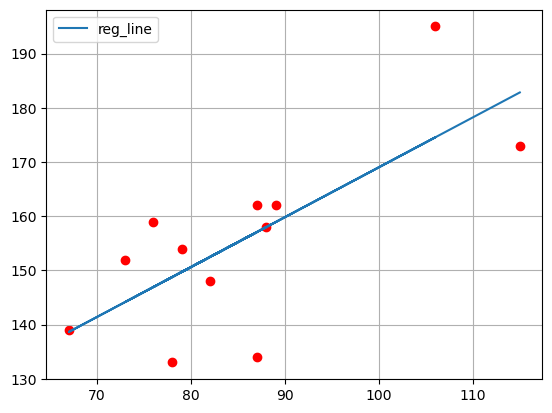

In [23]:
plt.plot(x,reg, label='reg_line')
plt.scatter(x,y, color='red')
plt.grid(True)
plt.legend()
plt.show()